In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('cluster42.csv')

Cluster e index no me aportan nada

In [0]:
df.drop('cluster', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)

Fecha al principio y ordenado por fecha (esto lo oharé en la consulta SQL)

In [0]:
df.insert(0,'fecha', df.pop("fecha"))

In [0]:
df['fecha'] =  pd.to_datetime(df['fecha'])

In [0]:
df = df.sort_values(['fecha'], ascending=1)

Todos los campos del DF a números

In [0]:
df = df.apply(pd.to_numeric)

In [8]:
df.dtypes

fecha                    int64
num_cars_min           float64
num_cars_max           float64
num_cars_mean          float64
num_cars_median        float64
num_cars_min_woo       float64
num_cars_max_woo       float64
num_cars_mean_woo      float64
num_cars_median_woo    float64
int_min                  int64
int_max                  int64
int_mean               float64
int_median             float64
ocu_min                  int64
ocu_max                  int64
ocu_mean               float64
ocu_median             float64
car_min                  int64
car_max                  int64
car_mean               float64
car_median             float64
int_min_woo              int64
int_max_woo              int64
int_mean_woo           float64
int_median_woo         float64
ocu_min_woo              int64
ocu_max_woo              int64
ocu_mean_woo           float64
ocu_median_woo         float64
car_min_woo              int64
car_max_woo              int64
car_mean_woo           float64
car_medi

Me cargo las columans que no me valen

In [0]:
df=df.drop(['fecha','num_cars_min', 'num_cars_max', 
            'num_cars_min_woo', 'num_cars_max_woo',
            'int_min', 'int_max', 'ocu_min', 'ocu_max', 
            'car_min', 'car_max', 'int_min_woo', 'int_max_woo', 
            'ocu_min_woo', 'ocu_max_woo', 
            'car_min_woo', 'car_max_woo'], axis=1)

In [10]:
df.columns

Index(['num_cars_mean', 'num_cars_median', 'num_cars_mean_woo',
       'num_cars_median_woo', 'int_mean', 'int_median', 'ocu_mean',
       'ocu_median', 'car_mean', 'car_median', 'int_mean_woo',
       'int_median_woo', 'ocu_mean_woo', 'ocu_median_woo', 'car_mean_woo',
       'car_median_woo', 'ocu_mean_25', 'ocu_mean_50', 'ocu_mean_75',
       'dia_semana', 'dia_mes', 'festivo', 'eve_3h', 'eve_3h_g', 'eve_2h',
       'eve_2h_g', 'eve_1h', 'eve_1h_g', 'vmax', 'vv', 'dv', 'dmax', 'ta',
       'tamin', 'tamax', 'prec', 'gran_evento'],
      dtype='object')

Para un primer entrenamiento, me quedo sólo con pocas coilumnas

In [0]:
df1 = df[[ 'ocu_mean','num_cars_mean','int_mean',
        'car_mean','dia_semana', 'dia_mes', 'festivo', 'eve_3h', 'gran_evento']]

Campo objetivo es OCU+1

In [12]:
df1['ocu+1']= df1.ocu_mean.shift(-1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


En Df1 tenemos lo que queremos entrenar....

In [13]:
df1.tail()

,ocu_mean,num_cars_mean,int_mean,car_mean,dia_semana,dia_mes,festivo,eve_3h,gran_evento,ocu+1
1819,4.020134,3.50,360.785235,11.859060,5,9,1,0,0,4.479730
1820,4.479730,4.75,351.337838,11.750000,5,9,1,0,0,4.466216
1821,4.466216,5.75,341.081081,11.891892,5,9,1,0,0,0.000000
1822,0.000000,3.25,0.000000,0.000000,5,9,1,0,0,0.000000
1823,0.000000,4.25,0.000000,0.000000,5,9,1,0,0,NaN


Quito la última fila...

In [14]:
df1 = df1.drop([1823])
df1.tail()

,ocu_mean,num_cars_mean,int_mean,car_mean,dia_semana,dia_mes,festivo,eve_3h,gran_evento,ocu+1
1818,4.693878,4.75,391.122449,13.292517,5,9,1,0,0,4.020134
1819,4.020134,3.50,360.785235,11.859060,5,9,1,0,0,4.479730
1820,4.479730,4.75,351.337838,11.750000,5,9,1,0,0,4.466216
1821,4.466216,5.75,341.081081,11.891892,5,9,1,0,0,0.000000
1822,0.000000,3.25,0.000000,0.000000,5,9,1,0,0,0.000000


In [0]:
df1 = df1.fillna(0)

In [16]:
df1.head()

,ocu_mean,num_cars_mean,int_mean,car_mean,dia_semana,dia_mes,festivo,eve_3h,gran_evento,ocu+1
0,1.903448,3.00,167.448276,5.620690,1,22,0,0,0,2.228758
1,2.228758,1.75,146.660131,4.921569,1,22,0,0,0,0.947020
2,0.947020,1.50,135.225166,4.205298,1,22,0,0,0,0.583333
3,0.583333,2.00,101.410256,3.102564,1,22,0,0,0,1.245033
4,1.245033,1.50,90.066225,2.807947,1,22,0,0,0,0.684211


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
values = df1.values
print(values.shape)

(1823, 10)


In [0]:
values = values.astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [21]:
scaled.shape

(1823, 10)

In [22]:
scaled.shape[0]

1823

Aqui luego habrá que incluir los datos de los ultimos n medidas (series to supervised)

In [0]:
n_train = int(scaled.shape[0] * 0.75)

In [24]:
train = scaled[:n_train, :]
test = scaled[n_train:, :]
print(train.shape, test.shape)

(1367, 10) (456, 10)


In [0]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [0]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [27]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1367, 1, 9) (1367,) (456, 1, 9) (456,)


In [0]:
from matplotlib import pyplot

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


Train on 1367 samples, validate on 456 samples
Epoch 1/50
 - 1s - loss: 0.1682 - val_loss: 0.2068
Epoch 2/50
 - 0s - loss: 0.1170 - val_loss: 0.1414
Epoch 3/50
 - 0s - loss: 0.0890 - val_loss: 0.1035
Epoch 4/50
 - 0s - loss: 0.0635 - val_loss: 0.0756
Epoch 5/50
 - 0s - loss: 0.0507 - val_loss: 0.0579
Epoch 6/50
 - 0s - loss: 0.0416 - val_loss: 0.0504
Epoch 7/50
 - 0s - loss: 0.0386 - val_loss: 0.0467
Epoch 8/50
 - 0s - loss: 0.0351 - val_loss: 0.0468
Epoch 9/50
 - 0s - loss: 0.0343 - val_loss: 0.0449
Epoch 10/50
 - 0s - loss: 0.0341 - val_loss: 0.0452
Epoch 11/50
 - 0s - loss: 0.0335 - val_loss: 0.0457
Epoch 12/50
 - 0s - loss: 0.0333 - val_loss: 0.0461
Epoch 13/50
 - 0s - loss: 0.0330 - val_loss: 0.0451
Epoch 14/50
 - 0s - loss: 0.0324 - val_loss: 0.0459
Epoch 15/50
 - 0s - loss: 0.0333 - val_loss: 0.0433
Epoch 16/50
 - 0s - loss: 0.0333 - val_loss: 0.0455
Epoch 17/50
 - 0s - loss: 0.0323 - val_loss: 0.0445
Epoch 18/50
 - 0s - loss: 0.0321 - val_loss: 0.0444
Epoch 19/50
 - 0s - loss: 

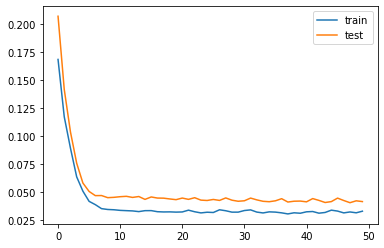

In [31]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error

In [0]:
# make a prediction
yhat = model.predict(test_X)
test_X_1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [34]:
print(yhat.shape, test_X_1.shape)

(456, 1) (456, 9)


In [0]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X_1), axis=1)

In [0]:
inv_yhat_1 = scaler.inverse_transform(inv_yhat)

In [0]:
inv_yhat_1 = inv_yhat_1[:,0]

In [39]:
inv_yhat_1.shape

(456,)

In [0]:
test_y = test_y.reshape((len(test_y), 1))

In [0]:
inv_y = concatenate((test_y, test_X[:,0,:]), axis=1)

In [43]:
print (test_y.shape, test_X[:,0,:].shape, test_X[:, 1:].shape)

(456, 1) (456, 9) (456, 0, 9)


In [0]:
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE


In [45]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat_1))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.655


In [0]:
df_y = pd.DataFrame(data=inv_y.tolist(), columns=['y'])

In [0]:
df_y['y_pred']=inv_yhat_1

In [50]:
df_y

,y,y_pred
0,0.626168,0.385009
1,1.688525,0.750690
2,2.925373,1.447218
3,2.746377,2.282937
4,4.041667,2.977136
...,...,...
451,4.020134,4.752571
452,4.479730,4.229467
453,4.466216,4.346893
454,0.000000,4.303551


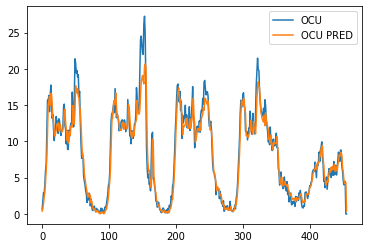

In [51]:
pyplot.plot(inv_y, label='OCU')
pyplot.plot(inv_yhat_1, label='OCU PRED')
pyplot.legend()
pyplot.show()

# Ahora con todo

In [0]:
df1 = df

Campo objetivo es OCU+1

In [0]:
df1['ocu+1']= df1.ocu_mean.shift(-1)

En Df1 tenemos lo que queremos entrenar....

In [54]:
df1.tail()

,num_cars_mean,num_cars_median,num_cars_mean_woo,num_cars_median_woo,int_mean,int_median,ocu_mean,ocu_median,car_mean,car_median,int_mean_woo,int_median_woo,ocu_mean_woo,ocu_median_woo,car_mean_woo,car_median_woo,ocu_mean_25,ocu_mean_50,ocu_mean_75,dia_semana,dia_mes,festivo,eve_3h,eve_3h_g,eve_2h,eve_2h_g,eve_1h,eve_1h_g,vmax,vv,dv,dmax,ta,tamin,tamax,prec,gran_evento,ocu+1
1819,3.50,3.0,999999.0,999999.0,360.785235,300.0,4.020134,2.0,11.859060,11.0,335.955224,290.0,2.163121,2.0,11.762963,12.0,4.991667,6.443182,9.666667,5,9,1,0,0,0,0,0,0,0,0,0,360,6.9,6.9,7.2,0.0,0,4.479730
1820,4.75,4.5,4.5,4.5,351.337838,260.0,4.479730,2.0,11.750000,11.0,311.045455,260.0,2.257143,2.0,11.132353,11.0,5.390244,7.585366,13.307692,5,9,1,0,0,0,0,0,0,0,0,0,360,7.9,6.8,8.1,0.0,0,4.466216
1821,5.75,6.0,6.0,6.0,341.081081,260.0,4.466216,2.0,11.891892,11.0,302.205882,230.0,2.185714,2.0,10.985401,11.0,5.124031,7.333333,11.739130,5,9,1,0,0,0,0,0,0,0,0,0,360,7.9,6.8,8.1,0.0,0,0.000000
1822,3.25,3.0,3.0,3.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,5,9,1,0,0,0,0,0,0,0,0,0,360,7.9,6.8,8.1,0.0,0,0.000000
1823,4.25,4.5,4.5,4.5,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,5,9,1,0,0,0,0,0,0,0,0,0,360,7.9,6.8,8.1,0.0,0,NaN


Quito la última fila...

In [58]:
df1 = df1.drop([df1.shape[0]-1])
df1.tail()

,num_cars_mean,num_cars_median,num_cars_mean_woo,num_cars_median_woo,int_mean,int_median,ocu_mean,ocu_median,car_mean,car_median,int_mean_woo,int_median_woo,ocu_mean_woo,ocu_median_woo,car_mean_woo,car_median_woo,ocu_mean_25,ocu_mean_50,ocu_mean_75,dia_semana,dia_mes,festivo,eve_3h,eve_3h_g,eve_2h,eve_2h_g,eve_1h,eve_1h_g,vmax,vv,dv,dmax,ta,tamin,tamax,prec,gran_evento,ocu+1
1818,4.75,4.0,4.0,4.0,391.122449,300.0,4.693878,2.0,13.292517,13.0,356.954887,280.0,2.716312,2.0,12.703704,13.0,5.655738,6.855670,13.358974,5,9,1,0,0,0,0,0,0,0,0,0,360,6.9,6.9,7.2,0.0,0,4.020134
1819,3.50,3.0,999999.0,999999.0,360.785235,300.0,4.020134,2.0,11.859060,11.0,335.955224,290.0,2.163121,2.0,11.762963,12.0,4.991667,6.443182,9.666667,5,9,1,0,0,0,0,0,0,0,0,0,360,6.9,6.9,7.2,0.0,0,4.479730
1820,4.75,4.5,4.5,4.5,351.337838,260.0,4.479730,2.0,11.750000,11.0,311.045455,260.0,2.257143,2.0,11.132353,11.0,5.390244,7.585366,13.307692,5,9,1,0,0,0,0,0,0,0,0,0,360,7.9,6.8,8.1,0.0,0,4.466216
1821,5.75,6.0,6.0,6.0,341.081081,260.0,4.466216,2.0,11.891892,11.0,302.205882,230.0,2.185714,2.0,10.985401,11.0,5.124031,7.333333,11.739130,5,9,1,0,0,0,0,0,0,0,0,0,360,7.9,6.8,8.1,0.0,0,0.000000
1822,3.25,3.0,3.0,3.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,5,9,1,0,0,0,0,0,0,0,0,0,360,7.9,6.8,8.1,0.0,0,0.000000


In [0]:
df1=df1.replace(999999.0, np.nan)

In [0]:
df1 = df1.fillna(0)

In [66]:
df1.tail()

,num_cars_mean,num_cars_median,num_cars_mean_woo,num_cars_median_woo,int_mean,int_median,ocu_mean,ocu_median,car_mean,car_median,int_mean_woo,int_median_woo,ocu_mean_woo,ocu_median_woo,car_mean_woo,car_median_woo,ocu_mean_25,ocu_mean_50,ocu_mean_75,dia_semana,dia_mes,festivo,eve_3h,eve_3h_g,eve_2h,eve_2h_g,eve_1h,eve_1h_g,vmax,vv,dv,dmax,ta,tamin,tamax,prec,gran_evento,ocu+1
1818,4.75,4.0,4.0,4.0,391.122449,300.0,4.693878,2.0,13.292517,13.0,356.954887,280.0,2.716312,2.0,12.703704,13.0,5.655738,6.855670,13.358974,5,9,1,0,0,0,0,0,0,0.0,0.0,0.0,360.0,6.9,6.9,7.2,0.0,0,4.020134
1819,3.50,3.0,0.0,0.0,360.785235,300.0,4.020134,2.0,11.859060,11.0,335.955224,290.0,2.163121,2.0,11.762963,12.0,4.991667,6.443182,9.666667,5,9,1,0,0,0,0,0,0,0.0,0.0,0.0,360.0,6.9,6.9,7.2,0.0,0,4.479730
1820,4.75,4.5,4.5,4.5,351.337838,260.0,4.479730,2.0,11.750000,11.0,311.045455,260.0,2.257143,2.0,11.132353,11.0,5.390244,7.585366,13.307692,5,9,1,0,0,0,0,0,0,0.0,0.0,0.0,360.0,7.9,6.8,8.1,0.0,0,4.466216
1821,5.75,6.0,6.0,6.0,341.081081,260.0,4.466216,2.0,11.891892,11.0,302.205882,230.0,2.185714,2.0,10.985401,11.0,5.124031,7.333333,11.739130,5,9,1,0,0,0,0,0,0,0.0,0.0,0.0,360.0,7.9,6.8,8.1,0.0,0,0.000000
1822,3.25,3.0,3.0,3.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,5,9,1,0,0,0,0,0,0,0.0,0.0,0.0,360.0,7.9,6.8,8.1,0.0,0,0.000000


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
values = df1.values
print(values.shape)

(1823, 38)


In [0]:
values = values.astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [71]:
scaled.shape

(1823, 38)

In [72]:
scaled.shape[0]

1823

Aqui luego habrá que incluir los datos de los ultimos n medidas (series to supervised)

In [0]:
n_train = int(scaled.shape[0] * 0.75)

In [74]:
train = scaled[:n_train, :]
test = scaled[n_train:, :]
print(train.shape, test.shape)

(1367, 38) (456, 38)


In [0]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [0]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [77]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1367, 1, 37) (1367,) (456, 1, 37) (456,)


In [0]:
from matplotlib import pyplot

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Train on 1367 samples, validate on 456 samples
Epoch 1/500
 - 1s - loss: 0.1355 - val_loss: 0.0955
Epoch 2/500
 - 0s - loss: 0.0543 - val_loss: 0.0503
Epoch 3/500
 - 0s - loss: 0.0388 - val_loss: 0.0471
Epoch 4/500
 - 0s - loss: 0.0342 - val_loss: 0.0456
Epoch 5/500
 - 0s - loss: 0.0330 - val_loss: 0.0427
Epoch 6/500
 - 0s - loss: 0.0327 - val_loss: 0.0442
Epoch 7/500
 - 0s - loss: 0.0331 - val_loss: 0.0411
Epoch 8/500
 - 0s - loss: 0.0334 - val_loss: 0.0430
Epoch 9/500
 - 0s - loss: 0.0331 - val_loss: 0.0417
Epoch 10/500
 - 0s - loss: 0.0392 - val_loss: 0.0485
Epoch 11/500
 - 0s - loss: 0.0365 - val_loss: 0.0486
Epoch 12/500
 - 0s - loss: 0.0353 - val_loss: 0.0416
Epoch 13/500
 - 0s - loss: 0.0349 - val_loss: 0.0468
Epoch 14/500
 - 0s - loss: 0.0349 - val_loss: 0.0434
Epoch 15/500
 - 0s - loss: 0.0336 - val_loss: 0.0425
Epoch 16/500
 - 0s - loss: 0.0333 - val_loss: 0.0430
Epoch 17/500
 - 0s - loss: 0.0371 - val_loss: 0.0484
Epoch 18/500
 - 0s - loss: 0.0373 - val_loss: 0.0415
Epoch 19

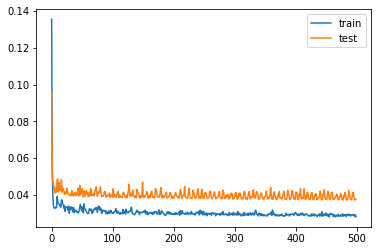

In [93]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error

In [0]:
# make a prediction
yhat = model.predict(test_X)
test_X_1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [108]:
print(yhat.shape, test_X_1.shape)

(456, 1) (456, 37)


In [0]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X_1), axis=1)

In [0]:
inv_yhat_1 = scaler.inverse_transform(inv_yhat)

In [0]:
inv_yhat_1 = inv_yhat_1[:,0]

In [112]:
inv_yhat_1.shape

(456,)

In [0]:
test_y = test_y.reshape((len(test_y), 1))

In [0]:
inv_y = concatenate((test_y, test_X[:,0,:]), axis=1)

In [115]:
print (test_y.shape, test_X[:,0,:].shape, test_X[:, 1:].shape)

(456, 1) (456, 37) (456, 0, 37)


In [0]:
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE


In [117]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat_1))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 541842.460


In [0]:
df_y = pd.DataFrame(data=inv_y.tolist(), columns=['y'])

In [0]:
df_y['y_pred']=inv_yhat_1

In [120]:
df_y

,y,y_pred
0,2.297583e+05,1.750790e+05
1,6.195661e+05,3.473073e+05
2,1.073400e+06,5.334209e+05
3,1.007721e+06,7.361904e+05
4,1.482998e+06,1.101435e+06
...,...,...
451,1.475098e+06,1.559381e+06
452,1.643736e+06,1.439478e+06
453,1.638778e+06,1.433722e+06
454,0.000000e+00,1.382376e+06


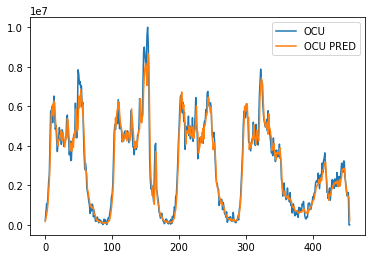

In [121]:
pyplot.plot(inv_y, label='OCU')
pyplot.plot(inv_yhat_1, label='OCU PRED')
pyplot.legend()
pyplot.show()

# Entrenando con menos datos, y guardandome otros para el final

In [0]:
df1 = df

Campo objetivo es OCU+1

In [0]:
df1['ocu+1']= df1.ocu_mean.shift(-1)

En Df1 tenemos lo que queremos entrenar....

In [69]:
df1.tail()

,num_cars_mean,num_cars_median,num_cars_mean_woo,num_cars_median_woo,int_mean,int_median,ocu_mean,ocu_median,car_mean,car_median,int_mean_woo,int_median_woo,ocu_mean_woo,ocu_median_woo,car_mean_woo,car_median_woo,ocu_mean_25,ocu_mean_50,ocu_mean_75,dia_semana,dia_mes,festivo,eve_3h,eve_3h_g,eve_2h,eve_2h_g,eve_1h,eve_1h_g,vmax,vv,dv,dmax,ta,tamin,tamax,prec,gran_evento,ocu+1
1819,3.50,3.0,999999.0,999999.0,360.785235,300.0,4.020134,2.0,11.859060,11.0,335.955224,290.0,2.163121,2.0,11.762963,12.0,4.991667,6.443182,9.666667,5,9,1,0,0,0,0,0,0,0,0,0,360,6.9,6.9,7.2,0.0,0,4.479730
1820,4.75,4.5,4.5,4.5,351.337838,260.0,4.479730,2.0,11.750000,11.0,311.045455,260.0,2.257143,2.0,11.132353,11.0,5.390244,7.585366,13.307692,5,9,1,0,0,0,0,0,0,0,0,0,360,7.9,6.8,8.1,0.0,0,4.466216
1821,5.75,6.0,6.0,6.0,341.081081,260.0,4.466216,2.0,11.891892,11.0,302.205882,230.0,2.185714,2.0,10.985401,11.0,5.124031,7.333333,11.739130,5,9,1,0,0,0,0,0,0,0,0,0,360,7.9,6.8,8.1,0.0,0,0.000000
1822,3.25,3.0,3.0,3.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,5,9,1,0,0,0,0,0,0,0,0,0,360,7.9,6.8,8.1,0.0,0,0.000000
1823,4.25,4.5,4.5,4.5,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,5,9,1,0,0,0,0,0,0,0,0,0,360,7.9,6.8,8.1,0.0,0,NaN


Quito la última fila...

In [70]:
df1 = df1.drop([df1.shape[0]-1])
df1.tail()

,num_cars_mean,num_cars_median,num_cars_mean_woo,num_cars_median_woo,int_mean,int_median,ocu_mean,ocu_median,car_mean,car_median,int_mean_woo,int_median_woo,ocu_mean_woo,ocu_median_woo,car_mean_woo,car_median_woo,ocu_mean_25,ocu_mean_50,ocu_mean_75,dia_semana,dia_mes,festivo,eve_3h,eve_3h_g,eve_2h,eve_2h_g,eve_1h,eve_1h_g,vmax,vv,dv,dmax,ta,tamin,tamax,prec,gran_evento,ocu+1
1818,4.75,4.0,4.0,4.0,391.122449,300.0,4.693878,2.0,13.292517,13.0,356.954887,280.0,2.716312,2.0,12.703704,13.0,5.655738,6.855670,13.358974,5,9,1,0,0,0,0,0,0,0,0,0,360,6.9,6.9,7.2,0.0,0,4.020134
1819,3.50,3.0,999999.0,999999.0,360.785235,300.0,4.020134,2.0,11.859060,11.0,335.955224,290.0,2.163121,2.0,11.762963,12.0,4.991667,6.443182,9.666667,5,9,1,0,0,0,0,0,0,0,0,0,360,6.9,6.9,7.2,0.0,0,4.479730
1820,4.75,4.5,4.5,4.5,351.337838,260.0,4.479730,2.0,11.750000,11.0,311.045455,260.0,2.257143,2.0,11.132353,11.0,5.390244,7.585366,13.307692,5,9,1,0,0,0,0,0,0,0,0,0,360,7.9,6.8,8.1,0.0,0,4.466216
1821,5.75,6.0,6.0,6.0,341.081081,260.0,4.466216,2.0,11.891892,11.0,302.205882,230.0,2.185714,2.0,10.985401,11.0,5.124031,7.333333,11.739130,5,9,1,0,0,0,0,0,0,0,0,0,360,7.9,6.8,8.1,0.0,0,0.000000
1822,3.25,3.0,3.0,3.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,5,9,1,0,0,0,0,0,0,0,0,0,360,7.9,6.8,8.1,0.0,0,0.000000


In [0]:
df1=df1.replace(999999.0, np.nan)

In [0]:
df1 = df1.fillna(0)

In [73]:
df1.tail()

,num_cars_mean,num_cars_median,num_cars_mean_woo,num_cars_median_woo,int_mean,int_median,ocu_mean,ocu_median,car_mean,car_median,int_mean_woo,int_median_woo,ocu_mean_woo,ocu_median_woo,car_mean_woo,car_median_woo,ocu_mean_25,ocu_mean_50,ocu_mean_75,dia_semana,dia_mes,festivo,eve_3h,eve_3h_g,eve_2h,eve_2h_g,eve_1h,eve_1h_g,vmax,vv,dv,dmax,ta,tamin,tamax,prec,gran_evento,ocu+1
1818,4.75,4.0,4.0,4.0,391.122449,300.0,4.693878,2.0,13.292517,13.0,356.954887,280.0,2.716312,2.0,12.703704,13.0,5.655738,6.855670,13.358974,5,9,1,0,0,0,0,0,0,0.0,0.0,0.0,360.0,6.9,6.9,7.2,0.0,0,4.020134
1819,3.50,3.0,0.0,0.0,360.785235,300.0,4.020134,2.0,11.859060,11.0,335.955224,290.0,2.163121,2.0,11.762963,12.0,4.991667,6.443182,9.666667,5,9,1,0,0,0,0,0,0,0.0,0.0,0.0,360.0,6.9,6.9,7.2,0.0,0,4.479730
1820,4.75,4.5,4.5,4.5,351.337838,260.0,4.479730,2.0,11.750000,11.0,311.045455,260.0,2.257143,2.0,11.132353,11.0,5.390244,7.585366,13.307692,5,9,1,0,0,0,0,0,0,0.0,0.0,0.0,360.0,7.9,6.8,8.1,0.0,0,4.466216
1821,5.75,6.0,6.0,6.0,341.081081,260.0,4.466216,2.0,11.891892,11.0,302.205882,230.0,2.185714,2.0,10.985401,11.0,5.124031,7.333333,11.739130,5,9,1,0,0,0,0,0,0,0.0,0.0,0.0,360.0,7.9,6.8,8.1,0.0,0,0.000000
1822,3.25,3.0,3.0,3.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,5,9,1,0,0,0,0,0,0,0.0,0.0,0.0,360.0,7.9,6.8,8.1,0.0,0,0.000000


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
values = df1.values
print(values.shape)

(1823, 38)


In [0]:
values = values.astype('float32')

In [77]:
values

array([[3.       , 2.5      , 4.       , ..., 0.       , 0.       ,
        2.228758 ],
       [1.75     , 1.5      , 2.       , ..., 0.       , 0.       ,
        0.9470199],
       [1.5      , 1.5      , 0.       , ..., 0.       , 0.       ,
        0.5833333],
       ...,
       [4.75     , 4.5      , 4.5      , ..., 0.       , 0.       ,
        4.466216 ],
       [5.75     , 6.       , 6.       , ..., 0.       , 0.       ,
        0.       ],
       [3.25     , 3.       , 3.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [79]:
scaled

array([[3.0000007e-07, 2.5000006e-07, 4.0000009e-07, ..., 0.0000000e+00,
        0.0000000e+00, 8.1779279e-02],
       [1.7500004e-07, 1.5000003e-07, 2.0000004e-07, ..., 0.0000000e+00,
        0.0000000e+00, 3.4748770e-02],
       [1.5000003e-07, 1.5000003e-07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.1404108e-02],
       ...,
       [4.7500009e-07, 4.5000010e-07, 4.5000010e-07, ..., 0.0000000e+00,
        0.0000000e+00, 1.6387779e-01],
       [5.7500012e-07, 6.0000013e-07, 6.0000013e-07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.2500009e-07, 3.0000007e-07, 3.0000007e-07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [80]:
scaled.shape[0]

1823

In [0]:
n_train = int(scaled.shape[0] * 0.65)
n_test = int(scaled.shape[0] * 0.25)
n_val = int(scaled.shape[0] * 0.10)

In [82]:
train = scaled[:n_train, :]
resto = scaled[n_train:, :]
test = resto[:n_test, :]
val = resto[n_test:,:]
print(train.shape, test.shape, val.shape)

(1184, 38) (455, 38) (184, 38)


In [83]:
val

array([[2.5000006e-08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.3430029e-02],
       [2.5000006e-08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.1104332e-02],
       [5.0000011e-08, 5.0000011e-08, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 3.5225045e-02],
       ...,
       [4.7500009e-07, 4.5000010e-07, 4.5000010e-07, ..., 0.0000000e+00,
        0.0000000e+00, 1.6387779e-01],
       [5.7500012e-07, 6.0000013e-07, 6.0000013e-07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.2500009e-07, 3.0000007e-07, 3.0000007e-07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [0]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
val_X, val_y = val[:, :-1], val[:, -1]

In [0]:
guarda_y = val_y
guarda_X = val_X

In [0]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0],1,val_X.shape[1]))

In [0]:
guarda_X = val_X

In [88]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape, val_X.shape, val_y.shape)

(1184, 1, 37) (1184,) (455, 1, 37) (455,) (184, 1, 37) (184,)


In [0]:
from matplotlib import pyplot

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Train on 1184 samples, validate on 455 samples
Epoch 1/200
 - 1s - loss: 0.1538 - val_loss: 0.0759
Epoch 2/200
 - 0s - loss: 0.0702 - val_loss: 0.0505
Epoch 3/200
 - 0s - loss: 0.0439 - val_loss: 0.0528
Epoch 4/200
 - 0s - loss: 0.0484 - val_loss: 0.0459
Epoch 5/200
 - 0s - loss: 0.0350 - val_loss: 0.0438
Epoch 6/200
 - 0s - loss: 0.0345 - val_loss: 0.0450
Epoch 7/200
 - 0s - loss: 0.0329 - val_loss: 0.0436
Epoch 8/200
 - 0s - loss: 0.0328 - val_loss: 0.0423
Epoch 9/200
 - 0s - loss: 0.0321 - val_loss: 0.0426
Epoch 10/200
 - 0s - loss: 0.0346 - val_loss: 0.0426
Epoch 11/200
 - 0s - loss: 0.0309 - val_loss: 0.0428
Epoch 12/200
 - 0s - loss: 0.0318 - val_loss: 0.0436
Epoch 13/200
 - 0s - loss: 0.0336 - val_loss: 0.0429
Epoch 14/200
 - 0s - loss: 0.0351 - val_loss: 0.0454
Epoch 15/200
 - 0s - loss: 0.0346 - val_loss: 0.0423
Epoch 16/200
 - 0s - loss: 0.0324 - val_loss: 0.0434
Epoch 17/200
 - 0s - loss: 0.0314 - val_loss: 0.0453
Epoch 18/200
 - 0s - loss: 0.0343 - val_loss: 0.0465
Epoch 19

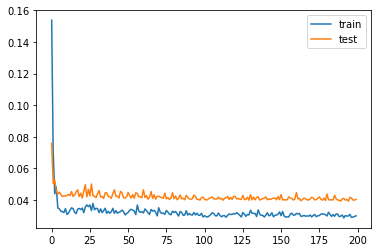

In [91]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error

In [93]:
guarda_y

array([0.01343003, 0.02110433, 0.03522504, 0.03936574, 0.02592955,
       0.04106673, 0.01908023, 0.02191715, 0.01945455, 0.06353511,
       0.02511853, 0.01541096, 0.01502187, 0.01115658, 0.02421722,
       0.02330486, 0.04563469, 0.02489866, 0.07653061, 0.09864502,
       0.14624685, 0.22546734, 0.29170743, 0.3747903 , 0.50202364,
       0.5750141 , 0.53902847, 0.54944444, 0.6018565 , 0.61319244,
       0.54276687, 0.5369613 , 0.41776982, 0.41481876, 0.4164036 ,
       0.37450284, 0.40738368, 0.4347972 , 0.4333125 , 0.5197547 ,
       0.45191273, 0.40886217, 0.40242898, 0.5087592 , 0.4415201 ,
       0.4496054 , 0.40409377, 0.5118169 , 0.6507008 , 0.7168278 ,
       0.78817004, 0.72997415, 0.72679883, 0.61625016, 0.5653052 ,
       0.5299281 , 0.5134556 , 0.4949925 , 0.5026668 , 0.53435344,
       0.47601414, 0.5776072 , 0.5482608 , 0.47271708, 0.44942632,
       0.41729018, 0.3649836 , 0.37316293, 0.34985274, 0.43982056,
       0.3554305 , 0.3773765 , 0.32046598, 0.37084147, 0.37860

In [95]:
# make a prediction
yhat = model.predict(guarda_X)
yhat

array([[0.0493169 ],
       [0.04064442],
       [0.03941592],
       [0.03890119],
       [0.0400624 ],
       [0.03514006],
       [0.04206979],
       [0.0340193 ],
       [0.03465094],
       [0.03407241],
       [0.04021367],
       [0.03123303],
       [0.03146549],
       [0.03119123],
       [0.03068573],
       [0.03694389],
       [0.04486242],
       [0.06064946],
       [0.06179804],
       [0.08744   ],
       [0.11566868],
       [0.16572998],
       [0.22504166],
       [0.29694512],
       [0.40339842],
       [0.49173227],
       [0.5817422 ],
       [0.5541583 ],
       [0.560239  ],
       [0.5855551 ],
       [0.5791654 ],
       [0.5222089 ],
       [0.52190477],
       [0.38879114],
       [0.40626433],
       [0.38755265],
       [0.39448664],
       [0.4034686 ],
       [0.4344458 ],
       [0.42462692],
       [0.49061313],
       [0.42571   ],
       [0.427024  ],
       [0.4022436 ],
       [0.46032256],
       [0.43191665],
       [0.42912892],
       [0.410

In [0]:
val_X_1 = guarda_X.reshape((guarda_X.shape[0], guarda_X.shape[2]))

In [99]:
print(guarda_X.shape, val_X_1.shape)

(184, 1, 37) (184, 37)


In [52]:
print(yhat.shape, val_X_1.shape)

(184, 1) (184, 37)


In [0]:
# invert scaling for forecast
inv_yhat = concatenate((val_X_1, yhat), axis=1)

In [101]:
inv_yhat

array([[2.5000006e-08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 4.9316898e-02],
       [2.5000006e-08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 4.0644418e-02],
       [5.0000011e-08, 5.0000011e-08, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 3.9415922e-02],
       ...,
       [4.7500009e-07, 4.5000010e-07, 4.5000010e-07, ..., 0.0000000e+00,
        0.0000000e+00, 1.4823787e-01],
       [5.7500012e-07, 6.0000013e-07, 6.0000013e-07, ..., 0.0000000e+00,
        0.0000000e+00, 1.4499541e-01],
       [3.2500009e-07, 3.0000007e-07, 3.0000007e-07, ..., 0.0000000e+00,
        0.0000000e+00, 2.7363492e-02]], dtype=float32)

In [108]:
inv_yhat_1 = scaler.inverse_transform(inv_yhat)
inv_yhat_1

array([[0.25      , 0.        , 0.        , ..., 0.        , 0.        ,
        1.3440499 ],
       [0.25      , 0.        , 0.        , ..., 0.        , 0.        ,
        1.1076959 ],
       [0.5       , 0.5       , 0.        , ..., 0.        , 0.        ,
        1.0742153 ],
       ...,
       [4.75      , 4.5       , 4.5       , ..., 0.        , 0.        ,
        4.039976  ],
       [5.75      , 6.        , 6.        , ..., 0.        , 0.        ,
        3.9516084 ],
       [3.2500002 , 3.        , 3.        , ..., 0.        , 0.        ,
        0.74574643]], dtype=float32)

In [0]:
inv_yhat_1 = inv_yhat_1[:, -1]

In [110]:
inv_yhat_1

array([ 1.3440499 ,  1.1076959 ,  1.0742153 ,  1.0601871 ,  1.0918341 ,
        0.9576839 ,  1.1465421 ,  0.9271392 ,  0.9443537 ,  0.9285867 ,
        1.0959566 ,  0.85120416,  0.8575394 ,  0.85006493,  0.8362886 ,
        1.0068443 ,  1.2226504 ,  1.6529    ,  1.6842027 ,  2.3830316 ,
        3.1523573 ,  4.5166945 ,  6.133136  ,  8.092745  , 10.993953  ,
       13.401344  , 15.854416  , 15.102661  , 15.268381  , 15.958328  ,
       15.784188  , 14.231935  , 14.223645  , 10.595856  , 11.072058  ,
       10.562102  , 10.751077  , 10.995865  , 11.840096  , 11.572499  ,
       13.370844  , 11.602017  , 11.637828  , 10.96248   , 12.545325  ,
       11.77117   , 11.695194  , 11.189065  , 13.233843  , 16.926231  ,
       17.975126  , 19.34161   , 18.879026  , 18.813688  , 16.421328  ,
       14.438461  , 13.61816   , 13.180598  , 13.128876  , 12.907591  ,
       13.631799  , 12.322315  , 14.731704  , 13.136682  , 12.644683  ,
       12.234844  , 11.552997  , 10.093804  , 10.594735  , 10.05

In [57]:
inv_yhat_1.shape

(184,)

In [0]:
val_y = val_y.reshape((len(val_y), 1))

In [0]:
inv_y = concatenate(( val_X[:,0,:], val_y), axis=1)

In [121]:
print (val_y.shape, val_X[:,0,:].shape, val_X[:, 1:].shape)

(184, 1) (184, 37) (184, 0, 37)


In [0]:
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, -1]
# calculate RMSE


In [123]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat_1))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.126


In [0]:
df_y = pd.DataFrame(data=inv_y.tolist(), columns=['y'])

In [0]:
df_y['y_pred']=inv_yhat_1

In [126]:
df_y

,y,y_pred
0,0.366013,1.344050
1,0.575163,1.107696
2,0.960000,1.074215
3,1.072848,1.060187
4,0.706667,1.091834
...,...,...
179,4.020134,4.381836
180,4.479730,4.035141
181,4.466216,4.039976
182,0.000000,3.951608


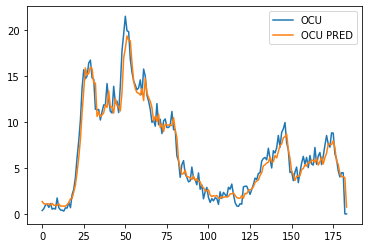

In [127]:
pyplot.plot(inv_y, label='OCU')
pyplot.plot(inv_yhat_1, label='OCU PRED')
pyplot.legend()
pyplot.show()

# Entrenar con más datos del pasado


https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/


A partir de aqui basurilla.....

In [0]:

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
                Observaciones para atras
        n_out: Number of observations as output (y).
                Observaciones para adelante +1 (es decir, si quiero ver t+1, hay que poner 2)
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    nombre_col=list(data.columns) 
    print(nombre_col)
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(nombre_col[j]+'(t-%d)' % (i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(nombre_col[j]+'(t)') for j in range(n_vars)]
        else:
            names += [(nombre_col[j]+'(t+%d)' % (i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [0]:
otro = series_to_supervised(df,3,2,dropnan=True)

['num_cars_mean', 'num_cars_median', 'num_cars_mean_woo', 'num_cars_median_woo', 'int_mean', 'int_median', 'ocu_mean', 'ocu_median', 'car_mean', 'car_median', 'int_mean_woo', 'int_median_woo', 'ocu_mean_woo', 'ocu_median_woo', 'car_mean_woo', 'car_median_woo', 'ocu_mean_25', 'ocu_mean_50', 'ocu_mean_75', 'dia_semana', 'dia_mes', 'festivo', 'eve_3h', 'eve_3h_g', 'eve_2h', 'eve_2h_g', 'eve_1h', 'eve_1h_g', 'vmax', 'vv', 'dv', 'dmax', 'ta', 'tamin', 'tamax', 'prec', 'gran_evento']


In [0]:
otro.columns

Index(['num_cars_mean(t-3)', 'num_cars_median(t-3)', 'num_cars_mean_woo(t-3)',
       'num_cars_median_woo(t-3)', 'int_mean(t-3)', 'int_median(t-3)',
       'ocu_mean(t-3)', 'ocu_median(t-3)', 'car_mean(t-3)', 'car_median(t-3)',
       ...
       'eve_1h_g(t+1)', 'vmax(t+1)', 'vv(t+1)', 'dv(t+1)', 'dmax(t+1)',
       'ta(t+1)', 'tamin(t+1)', 'tamax(t+1)', 'prec(t+1)', 'gran_evento(t+1)'],
      dtype='object', length=185)

In [0]:
cols = [c for c in otro.columns if c.lower()[-5:] != '(t+1)']

In [0]:
cols.append('ocu_mean(t+1)')

In [0]:
otro = otro[cols]

In [0]:
otro.insert(0,'ocu(t+1)', otro.pop("ocu_mean(t+1)"))

In [0]:
otro.corr()

,ocu(t+1),num_cars_mean(t-3),num_cars_median(t-3),num_cars_mean_woo(t-3),num_cars_median_woo(t-3),int_mean(t-3),int_median(t-3),ocu_mean(t-3),ocu_median(t-3),car_mean(t-3),...,eve_1h_g(t),vmax(t),vv(t),dv(t),dmax(t),ta(t),tamin(t),tamax(t),prec(t),gran_evento(t)
ocu(t+1),1.000000,-0.468905,-0.468905,-0.469272,-0.469272,0.787947,0.765570,0.827095,0.830076,0.818733,...,NaN,-0.087289,-0.087289,-0.087288,-0.087280,-0.087290,-0.087290,-0.087290,-0.087289,NaN
num_cars_mean(t-3),-0.468905,1.000000,1.000000,0.999879,0.999879,-0.660980,-0.648722,-0.531496,-0.541878,-0.642725,...,NaN,0.467865,0.467865,0.467865,0.467865,0.467865,0.467865,0.467865,0.467865,NaN
num_cars_median(t-3),-0.468905,1.000000,1.000000,0.999879,0.999879,-0.660980,-0.648722,-0.531496,-0.541878,-0.642725,...,NaN,0.467865,0.467865,0.467865,0.467865,0.467865,0.467865,0.467865,0.467865,NaN
num_cars_mean_woo(t-3),-0.469272,0.999879,0.999879,1.000000,1.000000,-0.661471,-0.649193,-0.531987,-0.542523,-0.643152,...,NaN,0.467859,0.467859,0.467859,0.467859,0.467859,0.467859,0.467859,0.467859,NaN
num_cars_median_woo(t-3),-0.469272,0.999879,0.999879,1.000000,1.000000,-0.661471,-0.649193,-0.531987,-0.542523,-0.643152,...,NaN,0.467859,0.467859,0.467859,0.467859,0.467859,0.467859,0.467859,0.467859,NaN
int_mean(t-3),0.787947,-0.660980,-0.660980,-0.661471,-0.661471,1.000000,0.971256,0.878934,0.898075,0.986709,...,NaN,-0.147872,-0.147872,-0.147868,-0.147861,-0.147873,-0.147873,-0.147873,-0.147872,NaN
int_median(t-3),0.765570,-0.648722,-0.648722,-0.649193,-0.649193,0.971256,1.000000,0.864335,0.884992,0.961456,...,NaN,-0.154151,-0.154152,-0.154147,-0.154142,-0.154153,-0.154153,-0.154153,-0.154152,NaN
ocu_mean(t-3),0.827095,-0.531496,-0.531496,-0.531987,-0.531987,0.878934,0.864335,1.000000,0.966957,0.940058,...,NaN,-0.098782,-0.098782,-0.098778,-0.098772,-0.098783,-0.098783,-0.098783,-0.098782,NaN
ocu_median(t-3),0.830076,-0.541878,-0.541878,-0.542523,-0.542523,0.898075,0.884992,0.966957,1.000000,0.941878,...,NaN,-0.120272,-0.120272,-0.120267,-0.120263,-0.120274,-0.120274,-0.120274,-0.120273,NaN
car_mean(t-3),0.818733,-0.642725,-0.642725,-0.643152,-0.643152,0.986709,0.961456,0.940058,0.941878,1.000000,...,NaN,-0.132121,-0.132122,-0.132118,-0.132112,-0.132123,-0.132123,-0.132123,-0.132122,NaN


In [0]:
from sklearn.model_selection import TimeSeriesSplit

In [0]:
tscv = TimeSeriesSplit(n_splits=5)

In [0]:
features = otro.columns.drop(['ocu(t+1)'])
X = otro[features].values
y = otro['ocu(t+1)'].values

In [0]:
train_size = int(len(X) * 0.80)
train_X, test_X = X[0:train_size], X[train_size:len(X)]

In [0]:
splits = TimeSeriesSplit(n_splits=5)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))


Observations: 147
Training Observations: 76
Testing Observations: 71
Observations: 218
Training Observations: 147
Testing Observations: 71
Observations: 289
Training Observations: 218
Testing Observations: 71
Observations: 360
Training Observations: 289
Testing Observations: 71
Observations: 431
Training Observations: 360
Testing Observations: 71


In [0]:
from matplotlib import pyplot

In [0]:
import numpy as np

class expanding_window(object):
    '''	
    Parameters 
    ----------
    
    Note that if you define a horizon that is too far, then subsequently the split will ignore horizon length 
    such that there is validation data left. This similar to Prof Rob hyndman's TsCv 
    
    
    initial: int
        initial train length 
    horizon: int 
        forecast horizon (forecast length). Default = 1
    period: int 
        length of train data to add each iteration 
    '''
    

    def __init__(self,initial= 1,horizon = 1,period = 1):
        self.initial = initial
        self.horizon = horizon 
        self.period = period 


    def split(self,data):
        '''
        Parameters 
        ----------
        
        Data: Training data 
        
        Returns 
        -------
        train_index ,test_index: 
            index for train and valid set similar to sklearn model selection
        '''
        self.data = data
        self.counter = 0 # for us to iterate and track later 


        data_length = data.shape[0] # rows 
        data_index = list(np.arange(data_length))
         
        output_train = []
        output_test = []
        # append initial 
        output_train.append(list(np.arange(self.initial)))
        progress = [x for x in data_index if x not in list(np.arange(self.initial)) ] # indexes left to append to train 
        output_test.append([x for x in data_index if x not in output_train[self.counter]][:self.horizon] )
        # clip initial indexes from progress since that is what we are left 
         
        while len(progress) != 0:
            temp = progress[:self.period]
            to_add = output_train[self.counter] + temp
            # update the train index 
            output_train.append(to_add)
            # increment counter 
            self.counter +=1 
            # then we update the test index 
            
            to_add_test = [x for x in data_index if x not in output_train[self.counter] ][:self.horizon]
            output_test.append(to_add_test)

            # update progress 
            progress = [x for x in data_index if x not in output_train[self.counter]]	
            
        # clip the last element of output_train and output_test
        output_train = output_train[:-1]
        output_test = output_test[:-1]
        
        # mimic sklearn output 
        index_output = [(train,test) for train,test in zip(output_train,output_test)]
        
        return index_output
        
        
#%%
#%%
# demo 

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])

y = np.array([1, 2, 3, 4, 5, 6])
tscv = expanding_window()
for train_index, test_index in tscv.split(X):
    print(train_index)
    print(test_index)



X = np.random.randint(0,1000,size = (120,2))
y = np.random.randint(0,1000,size = (120,1))

tscv = expanding_window(initial = 36, horizon = 24,period = 1)
for train_index, test_index in tscv.split(X):
    print(train_index)
    print(test_index)

[0]
[1]
[0, 1]
[2]
[0, 1, 2]
[3]
[0, 1, 2, 3]
[4]
[0, 1, 2, 3, 4]
[5]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57

In [0]:
tscv = expanding_window(initial = 36, horizon = 24, period=1)
for train_index, test_index in tscv.split(X):
    print(train_index)
    print(test_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1

In [0]:
X.shape

(431, 148)

In [0]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import numpy as np

model = GradientBoostingRegressor(random_state=0, 
                                           n_estimators=200, 
                                           max_features='sqrt')

Niterations = [500,1000]
learningRate = [1,0.5,0.1]
maxDepth = 3

param_search = {'n_estimators': Niterations,'learning_rate':learningRate }

tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv,
                        param_grid=param_search, n_jobs=-1)
gsearch.fit(X, y)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_sam...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [500, 1000], 'learning_rate': [1, 0.5, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
model.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [0]:
print("best mean cross-validation score: {:.3f}".format(gsearch.best_score_))
print("best parameters: {}".format(gsearch.best_params_))

best mean cross-validation score: -0.060
best parameters: {'learning_rate': 0.1, 'n_estimators': 1000}


In [0]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

model = RandomForestRegressor(random_state=0, 
                                           n_estimators=200, 
                                           max_features='sqrt')

In [0]:
tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv,
                        param_grid=tuned_parameters, n_jobs=-1)

In [0]:
gsearch.fit(X, y)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [0]:
print("best mean cross-validation score: {:.3f}".format(gsearch.best_score_))
print("best parameters: {}".format(gsearch.best_params_))

best mean cross-validation score: 0.559
best parameters: {'max_depth': 3}
